In [1]:
"""Libraries"""

# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import numpy as np   # matrices, math
import os    # file management
import pandas as pd   # data frames
import importlib   # For reloading your own files

# my own file:
import diffeq as de   # numeric constants and coefficents
importlib.reload(de)   # reload changes you made

<module 'diffeq' from 'F:\\OneDrive - Budapesti Műszaki és Gazdaságtudományi Egyetem\\TDK\\Letisztázott programok\\diffeq.py'>

In [103]:
"""Base settings"""

directory = 'F:\\OneDrive - Budapesti Műszaki és Gazdaságtudományi Egyetem\\TDK\\Letisztázott programok\\test 1'
file_base_name = 'output_'

In [114]:
"""Load all CSV files from directory into a dataframe (all_data)"""

# list all files in a given directory
def list_all_files(directory):
    list_of_files = os.listdir(directory)
    all_files = []
    # Iterate over all the entries
    for entry in list_of_files:
        # Create full path
        full_path = os.path.join(directory, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(full_path):
            all_files = all_files + list_all_files(full_path)
        else:
            all_files.append(full_path)
                
    return all_files

# create a dataframe
all_data = pd.DataFrame()

# Load all files
parent_dir = os.getcwd()
save_dir = os.path.join(parent_dir, directory)
all_files = list_all_files(save_dir)
num = 0
print(f'Found files:')
for file in all_files:
    # check if it's a CSV starting with file_base_name
    file_name = os.path.basename(file)
    if file_name[-4:] != '.csv':
        continue
    if file_name[:len(file_base_name)] != file_base_name:
        continue
    
    # Load csv into all_data
    current_data = pd.read_csv(file)
    print(f'\t{file_name}\t({current_data.shape[0]} rows)')
    all_data = pd.concat([all_data, current_data])
    num += 1
    
# Print some stats:
print(f'_______________________________________')
print(f'total number of files: {num}')
total = all_data.shape[0]
print(f'total:  {total} rows   (100 %)')
for error_code in range(5):
    num = all_data.loc[(all_data['error_code'] == error_code)].shape[0]
    print(f'error code {error_code}: {num} rows   ({(100*num/total):.2f} %)')
num = all_data.loc[(all_data['T_max'] > 6000.0)].shape[0]
print(f'too hot: {num} rows    ({100*num/total:.2f} %)')
print(f'_______________________________________')

Found files:
	output_1.csv	(101 rows)
	output_2.csv	(101 rows)
	output_3.csv	(101 rows)
	output_4.csv	(97 rows)
_______________________________________
total number of files: 4
total:  400 rows   (100 %)
error code 0: 305 rows   (76.25 %)
error code 1: 91 rows   (22.75 %)
error code 2: 0 rows   (0.00 %)
error code 3: 0 rows   (0.00 %)
error code 4: 4 rows   (1.00 %)
too hot: 0 rows    (0.00 %)
_______________________________________


In [115]:
"""Locate valid (good_data) and wrong (wrong_data) simulations"""

# Get valid datas
good_data = all_data.loc[
    ((all_data['error_code'] != 3) & (all_data['error_code'] != 4)) &
    (all_data['energy'] > 0.0) & (all_data['energy'] == all_data['energy']) # positive not NaN
    # or set negative energy to inf: good_data.loc[good_data['energy'] < 0.0, 'energy'] = 1e10
]

# Everything that's not in good_data
wrong_data = pd.concat([good_data, all_data]).drop_duplicates(keep=False)

# Sort by energy
good_data = good_data.sort_values(['energy'], ascending=True)

# New column
good_data['logE'] = np.log10(good_data['energy'])

In [116]:
"""Let's see the database"""

good_data[['ID', 'error_code', 'steps', 'elapsed_time', 'T_max', 'collapse_time', 'n_H2', 'n_O2',
       'work', 'energy', 'R_E', 'ratio', 'P_inf', 'alfa_M',
       'T_inf', 'surfactant']]

,ID,error_code,steps,elapsed_time,T_max,collapse_time,n_H2,n_O2,work,energy,R_E,ratio,P_inf,alfa_M,T_inf,surfactant
8,10,0,7361,0.890625,3876.249634,1.472997e-07,2.926142e-17,1.449381e-17,5.158606e-10,8.814689e+03,0.000001,5.0,1000000.0,0.05,303.15,1.0
10,11,0,10362,1.265625,4543.268565,9.457402e-08,6.341162e-17,3.143979e-17,1.264638e-09,9.971661e+03,0.000001,5.0,2500000.0,0.05,303.15,1.0
47,50,0,10616,1.328125,4077.168643,2.958857e-07,1.975522e-16,9.829785e-17,4.051707e-09,1.025477e+04,0.000002,5.0,1000000.0,0.05,303.15,1.0
3,207,0,18869,2.484375,3405.570320,4.435253e-07,4.069252e-15,2.021095e-15,1.004288e-07,1.233996e+04,0.000007,3.0,2500000.0,0.05,303.15,1.0
64,167,0,16026,2.015625,3385.180068,2.955429e-07,1.165040e-15,5.788828e-16,2.980042e-08,1.278944e+04,0.000005,3.0,2500000.0,0.05,303.15,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,241,0,3292,0.281250,853.736239,2.095457e-06,3.168911e-35,-2.086123e-36,2.119565e-09,3.344312e+22,0.000010,2.0,100000.0,0.05,303.15,1.0
4,2,0,2751,0.265625,1078.572782,6.644910e-08,7.165440e-38,2.383382e-49,2.198313e-11,1.533969e+23,0.000001,2.0,1000000.0,0.05,303.15,1.0
16,121,0,3195,0.296875,747.605424,8.043027e-07,6.938954e-39,-6.270773e-38,1.496628e-10,1.078425e+25,0.000004,2.0,100000.0,0.05,303.15,1.0
78,81,0,3135,0.281250,709.197514,5.911862e-07,4.303930e-42,9.880950e-42,6.642273e-11,7.716521e+27,0.000003,2.0,100000.0,0.05,303.15,1.0


In [117]:
"""Print some statistics"""

good_data[['ID', 'error_code', 'steps', 'elapsed_time', 'T_max', 'collapse_time', 'n_H2', 'n_O2',
       'work', 'energy', 'R_E', 'ratio', 'P_inf', 'alfa_M',
       'T_inf', 'surfactant']].describe()

,ID,error_code,steps,elapsed_time,T_max,collapse_time,n_H2,n_O2,work,energy,R_E,ratio,P_inf,alfa_M,T_inf,surfactant
count,385.000000,385.000000,385.000000,385.000000,385.000000,3.850000e+02,3.850000e+02,3.850000e+02,3.850000e+02,3.850000e+02,385.000000,385.000000,3.850000e+02,3.850000e+02,3.850000e+02,385.0
mean,199.592208,0.236364,15302.716883,4.120860,3271.776716,7.401602e-06,6.424858e-13,3.195584e-13,5.418124e-04,1.898680e+29,0.000009,20.358442,2.130130e+06,5.000000e-02,3.031500e+02,1.0
std,115.859211,0.425401,7407.243871,4.259994,1035.279383,1.394914e-05,2.276292e-12,1.132487e-12,2.267677e-03,3.725084e+30,0.000008,15.352332,1.845808e+06,3.543441e-16,1.935191e-12,0.0
min,1.000000,0.000000,2263.000000,0.234375,541.069428,3.047433e-08,2.348469e-47,-7.854400e-23,3.433060e-12,8.814689e+03,0.000001,2.000000,1.000000e+05,5.000000e-02,3.031500e+02,1.0
25%,99.000000,0.000000,10808.000000,1.593750,2396.167705,8.043027e-07,1.381013e-16,6.776509e-17,9.522406e-08,1.280247e+05,0.000003,5.000000,1.000000e+06,5.000000e-02,3.031500e+02,1.0
50%,197.000000,0.000000,15036.000000,2.187500,3365.672093,2.501768e-06,7.831966e-15,3.890884e-15,3.046665e-06,2.441777e+05,0.000005,20.000000,1.000000e+06,5.000000e-02,3.031500e+02,1.0
75%,299.000000,0.000000,18428.000000,4.625000,3923.358460,7.363670e-06,1.097237e-13,5.453559e-14,7.045466e-05,2.972128e+06,0.000015,30.000000,2.500000e+06,5.000000e-02,3.031500e+02,1.0
max,399.000000,1.000000,67991.000000,17.515625,5547.488397,1.180384e-04,2.217854e-11,1.103269e-11,2.092494e-02,7.309144e+31,0.000025,50.000000,5.000000e+06,5.000000e-02,3.031500e+02,1.0


succecfully solved with LSODA solver


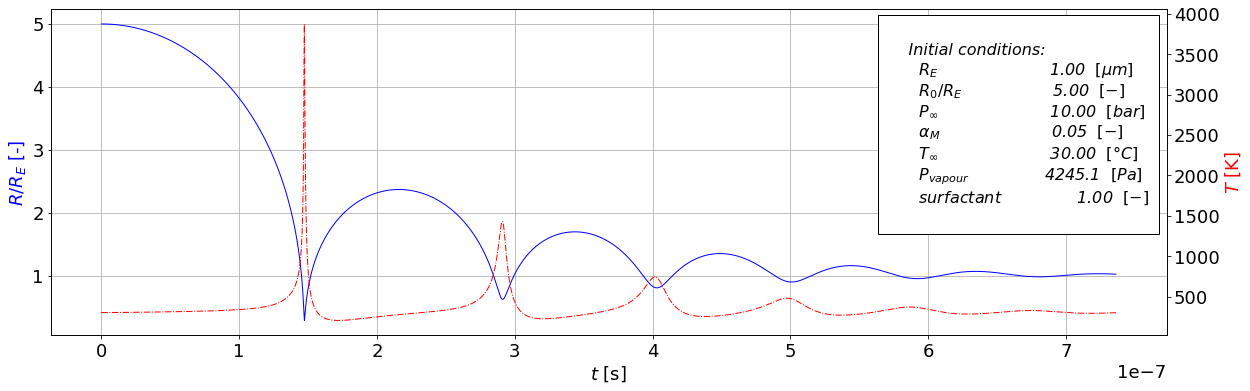

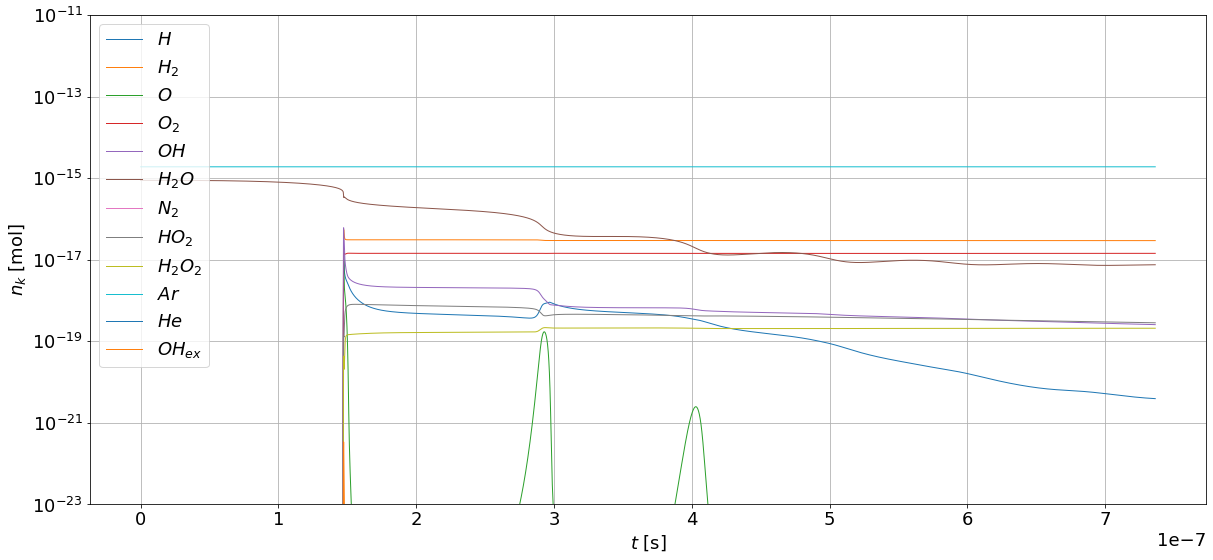

Control parameters:
    	ID = 10
    	R_E = 1.00 [um]
    	ratio = 5.00 [-]
    	P_inf = 10.00 [bar]
    	alfa_M = 0.05 [-]
    	T_inf = 30.00 [°C]
    	P_v = 4245.13 [Pa]
    	surfactant = 1.00 [bar]
    Simulation info:
    	error_code = 0
    	elapsed_time = 0.86 [s]
    	steps = 7361 [-]
    Final state:
    	R_final = 1.01 [um];   R_dot_final =-9.712559591983886e-16 [m/s];   T_final = 303.15 [K]
    	n_H2 =2.926141546349281e-17 [mol]; n_O2 =1.449381369486966e-17 [mol]
    	Final molar concentrations: [mol/cm^3]
		H: 3.0145234192812417e-24;  H_2: 6.820080152930026e-06;  O: 3.392548542561016e-25;  O_2: 3.3781336122981516e-06;  
		OH: 4.587843739834599e-25;  H_2O: 1.684220445877368e-06;  N_2: 0.0;  HO_2: 3.5526088816357144e-11;  
		H_2O_2: 6.375963920014648e-08;  Ar: 0.00044144824334572995;  He: 0.0;  OH_{ex}: 4.123130180187508e-51;  
Results:
    	collapse_time = 1.472996677205488e-07 [s]
    	T_max = 3876.25 [K]
    	expansion work = 5.158605720977184e-10 [J]
    	hydrogen producti

In [118]:
"""Plot a certain simulation"""

# converts a line of all_data to a dictionary containing the control parameters (cpar)
def line_to_dict(line):
    return de.dotdict(dict(
        ID=line['ID'],
        R_E=line['R_E'], # [m]
        ratio=line['ratio'], # [-]
        P_inf=line['P_inf'], # [Pa]
        alfa_M=line['alfa_M'], # [-]
        T_inf=line['T_inf'], # [m]
        surfactant=line['surfactant'], # [-]
        P_v=de.VapourPressure(line['T_inf']) # [Pa]
    ))
    
cpar = line_to_dict(good_data.iloc[0])   # choose the most energy efficient one
de.plot(cpar)